In [1]:
!pip show brunel

Name: brunel
Version: 2.3
Summary: Brunel Visualization For Jupyter/IPython Notebooks
Home-page: UNKNOWN
Author: UNKNOWN
Author-email: UNKNOWN
License: Apache Software License 2.0
Location: /opt/conda/envs/DSX-Python27/lib/python2.7/site-packages
Requires: pandas, jinja2, JPype1, jupyter-pip, ipython


# Visualize car data with Brunel

The Brunel Visualization language makes it easy to build interactive charts and diagrams that you can deploy rapidly. This notebook contains the steps and code to get you started with visualizing data with Brunel.

Some familiarity with Python is recommended. 

You will use data about cars to graph the relationships between various properties, for example, how horsepower affects gas mileage. The cars data set was used for the 1983 American Statistical Association Data Exposition. This data set was collected by Ernesto Ramos and David Donoho and obtained from StatLib.

## Table of contents

This notebook has the following sections:
1. [Load the data](#data_set)
1. [Visualize the data](#visualize)
1. [Modify the DataFrame to highlight specific data](#highlight)
1. [Summary and next steps](#summary)

<a id="data_set"></a>
## 1. Load the data 
The car data is a freely available data set on the Data Science Experience home page.

1. Go to the <a href="https://apsportal.ibm.com/exchange/public/entry/view/c81e9be8daf6941023b9dc86f303053b" target="_blank">Car performance data</a> card on the Data Science Experience home page.
1. Click the link button.
1. Hover above the link button next to the access key to display the link.
1. Double-click the link to select it, copy the link, and click **Close**.
1. In the cell below, replace the **LINK-TO-DATA** string in the read_csv() method with the link.

 
Run the next cell to import pandas and Brunel libraries, load the data into a pandas DataFrame, and display the first five rows of data:

In [2]:
import pandas as pd
import brunel

cars = pd.read_csv("https://apsportal.ibm.com/exchange-api/v1/entries/c81e9be8daf6941023b9dc86f303053b/data?accessKey=f65fafad2235fe976ababdb6800db44d",
                   usecols=['mpg','cylinders','engine','horsepower','weight','acceleration','year','origin','name'])

cars.head(6)

,mpg,cylinders,engine,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,American,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,American,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,American,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,American,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,American,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,American,ford galaxie 500


<a id="visualize"></a>
## 2. Visualize the data
You'll create some charts and diagrams with Brunel commands.

The basic format of each call to Brunel is simple. Whether the command is a single line or a set of lines, the commands are concatenated together and the result interpreted as one command.

Here are some of the rules for using Brunel that you'll need in this notebook:
 * __DataFrame__: Use the `data` command to specify the pandas DataFrame. 
 * __Chart type__: Use commands like `chord` and `treemap` to specify a chart type. If you don't specify a type, the default chart type is a scatterplot. 
 * __Chart definition__: Use the `x` and `y` commands to specify the data to include on the x-axis and the y-axis.
 * __Styling__: Use commands like `color`, `tooltip`, and `label` to control the styling of the graph.
 * __Size__: Use the `width` and `height` key-value pairs to specify the size of the graph. The key-value pairs must be preceded with two colons and separated with a comma, for example: `:: width=800, height=300`
 
See detailed documentation on the Brunel Visualization language at __[Introduction to Brunel](http://brunel.mybluemix.net/docs/)__.

### Scatter plots
Run the next cell to show the relationship between the miles per gallon and the horsepower of the vehicles in a scatter plot. The color identifies the origin of the vehicles. 

In [3]:
%brunel data('cars') x(mpg) y(horsepower) color(origin) :: width=800, height=300

<IPython.core.display.Javascript object>

Put your cursor over the chart and scroll to zoom in and out. When you zoom in, you can pan across the chart by clicking and dragging. 

Run the next cell to show the relationship between the horsepower and the weight of the cars in a scatter plot. The color is based on the origin of the cars. The tooltips show the name of the cars. 

In [4]:
%brunel data('cars') x(horsepower) y(weight) color(origin) tooltip(name) :: width=800, height=300

<IPython.core.display.Javascript object>

### Chord plot
Run the next cell to show a chord plot that correlates the origin and number of cars produced per year. The x and y commands specify that the origin is mapped to the year of manufacture. The size of the segments is based on the number of cars. The color is based on the origin of the cars.

In [5]:
%brunel data('cars') x(origin) y(year) chord size(#count) color(origin) :: width=500, height=400

<IPython.core.display.Javascript object>

### Treemap
A treemap can show many dimensions as recursively divided rectangles.

Run the next cell to show a treemap that groups vehicles by their origin, year of manufacture, and number of cylinders. The color indicates the average gas mileage of the vehicles in each block. The numbers in each block are the number of cylinders. The size of the blocks reflects the number of vehicles in the category. The tooltips show all the information.

In [6]:
%brunel data('cars') treemap x(origin, year, cylinders) color(mpg) mean(mpg) size(#count) label(cylinders) tooltip(#all):: width=900, height=600

<IPython.core.display.Javascript object>

<a id="highlight"></a>
## 3. Modify the DataFrame to highlight specific data
You can modify or add to the DataFrame to show data in different ways. In the following example, you apply a function that takes a string and tests whether it matches one of a set of substrings. The function maps to the names column to create a new column that consists of the names that match either "Ford" or "Buick". 

In [7]:
def identify(x, search): 
    for y in search: 
        if y.lower() in x.lower(): return y
    return None

cars['Type'] = cars.name.map(lambda x: identify(x, ["Ford", "Buick"]))

Run the next cell to create a scatter chart that plots gas mileage versus engine size. The Buick cars have blue dots and the Ford cars have red dots. The Brunel command is split into two chart definitions that are combined by the overlay operator (a plus sign). Both chart definitions set the x-axis, the y-axis, and the color to the same values but set the style to different values. The first chart definition sets the style of the dots and the second definition sets the style of the words in the legend. The last line of the command sets the width and height of the chart.

In [8]:
%%brunel data('cars') x(engine) y(mpg) color(Type)  style('size:50%; fill:#eee') +
     x(engine) y(mpg) color(Type) style('text {font-size:14; font-weight:bold; fill:darker}') 
     :: width=800, height=800

<IPython.core.display.Javascript object>

<a id="summary"></a>
## 4. Summary and next steps
You explored different types of charts and formatting and learned how you can use the pandas DataFrame to refine your charts. Try changing the formatting of these charts, or creating your own. 

For more information about the Brunel Visualization language, see __[Introduction to Brunel](http://brunel.mybluemix.net/docs/)__.

Also read the Brunel blog at __[Working Vis - Perspectives on Actionable Visualization](http://brunelvis.org/)__.

### Authors

Dan Rope and Graham Wills are visualization architects at IBM. They created the Brunel visualization language.

In [9]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

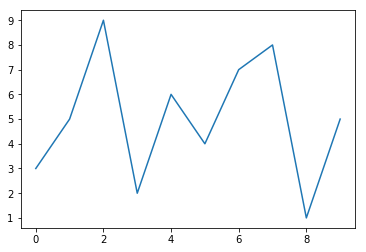

In [10]:
from pylab import plot, show, bar
 
y = [3,5,9,2,6,4,7,8,1,5]   # a list of numbers
plot(y)                     # draw the graph
show()                      # show it to me!

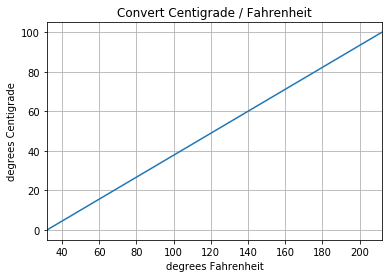

In [11]:
 
#   Range of scales between freezing to boiling water
F = [32,212]                    # Fahrenheit
C = [0,100]                     # Centigrade
 
plt.title('Convert Centigrade / Fahrenheit')
plt.ylabel('degrees Centigrade')
plt.xlabel('degrees Fahrenheit')
plt.xlim(32,212)                # try commenting this out...
plt.grid(True)
 
plt.plot(F,C)
plt.show()

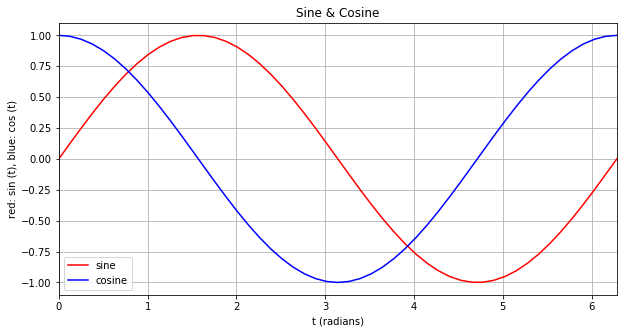

In [12]:
import matplotlib.pyplot as plt
from math import sin, cos, pi
 
npoints=50
x = [x*2*pi/npoints for x in range(npoints+1)]
y1 = [sin(t) for t in x]
y2 = [cos(t) for t in x]
 
plt.figure(figsize=(10, 5))
plt.title('Sine & Cosine')
plt.xlabel('t (radians)')
plt.ylabel('red: sin (t), blue: cos (t)')
plt.grid(True)
plt.xlim(0,2*pi)
plt.ylim(-1.1,1.1)
 
plt.plot(x, y1, color="red", label="sine")
plt.plot(x, y2, color="blue", label="cosine")
plt.legend()
 
plt.show()

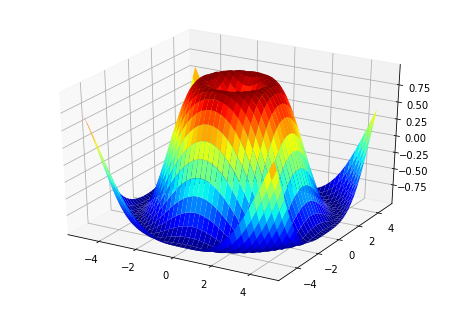

In [13]:
#   Mplot3d.py
#   Adapted from http://matplotlib.org/mpl_toolkits/mplot3d/
 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm   # colour map
import matplotlib.pyplot as plt
import numpy as np          # http://www.numpy.org/
 
ax = Axes3D(plt.figure())
 
#   http://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html
X = np.arange(-5, 5, 0.25)  # Return evenly spaced values within an interval
Y = np.arange(-5, 5, 0.25)
 
#   http://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html
X, Y = np.meshgrid(X, Y)    # Return coordinate matrices from coordinate vectors
R = np.sqrt(X**2 + Y**2)    # Square roots of squares
Z = np.sin(R)               # Sine of that.
 
#   http://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html#surface-plots
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.jet)
 
plt.show()

In [14]:
!echo $BRUNEL_CONFIG

locjavascript=/data/jupyter2/static-file-content-delivery-network/nbextensions/brunel_ext


In [15]:
!ls -la /usr/local/src/bluemix_jupyter_bundle/notebook/share/jupyter/nbextensions/brunel_ext_python3

ls: cannot access /usr/local/src/bluemix_jupyter_bundle/notebook/share/jupyter/nbextensions/brunel_ext_python3: No such file or directory


In [16]:
!echo $USER

In [17]:
!ls -la /usr/local/src/conda3_runtime/4.1.1/lib/python3.5/site-packages/brunel/brunel_ext/

ls: cannot access /usr/local/src/conda3_runtime/4.1.1/lib/python3.5/site-packages/brunel/brunel_ext/: No such file or directory


In [18]:
!ls -la /usr/local/src/bluemix_jupyter_bundle/notebook/share/jupyter/nbextensions

ls: cannot access /usr/local/src/bluemix_jupyter_bundle/notebook/share/jupyter/nbextensions: No such file or directory
